## Interpreting abundances with chempy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [3]:
data = Table.read('../data/STs_for_chempy.fits', format='fits')
el_names = data.colnames[3::2] # magic
err_names = data.colnames[4::2]


#### load up Jan's Solar abundances:

In [8]:
x = np.load("../data/[2]posterior_100_Sun-predictions.npy")
y = np.load("../data/[3]predicted_element_names.npy")
for i,item in enumerate(y):
    print(item,np.median(x[:,i]),'+-',np.std(x[:,i]))

Fe -0.05236939885020275 +- 0.061973267953103796
O 0.14124797676453404 +- 0.07958465573507391
Na 0.2703209968721536 +- 0.07845643376718812
Mg 0.025945304509467526 +- 0.07041198047974788
Al 0.11384539100839808 +- 0.08147465702227544
Si 0.21571735741698372 +- 0.037009385325165914
S 0.19014242128613423 +- 0.039907886691498966
Ca 0.00883028042476841 +- 0.04411411675457362
V -0.16723689314414703 +- 0.02841648899149541
Mn 0.11060540169168309 +- 0.03927567799253105
Co -0.06394600865761602 +- 0.06060708205475778
Ni 0.2165610291078881 +- 0.025279463574813043
Cu -0.10756046441771971 +- 0.10607712986082651
Zn -0.2513681328253119 +- 0.07967744528596993
C 0.057576876578344205 +- 0.06783522714011568
Ti -0.17631813386302841 +- 0.04299903911234888
Sc -0.34388003870911454 +- 0.10127600441322712
Cr 0.07789504160256833 +- 0.010311644615551785


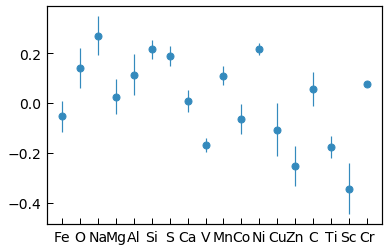

In [28]:
plt.errorbar(np.arange(len(y)), np.median(x, axis=0), yerr=np.std(x, axis=0), fmt='o')
plt.xticks(np.arange(len(y)), y);

#### now make a new dataset having propagated the Solar offsets through:

In [38]:
el_to_delete = np.asarray(el_names)[~np.isin(el_names, y)]

In [39]:
data.remove_columns(el_to_delete)

In [42]:
data.remove_columns(['{0}_err'.format(e) for e in el_to_delete])

In [44]:
data

star_name,age,age_err,Fe,Fe_err,O,O_err,Na,Na_err,Mg,Mg_err,Al,Al_err,Si,Si_err,S,S_err,Ca,Ca_err,V,V_err,Mn,Mn_err,Co,Co_err,Ni,Ni_err,Cu,Cu_err,Zn,Zn_err,C,C_err,Ti,Ti_err,Sc,Sc_err,Cr,Cr_err
bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HIP10175,3.2,0.4,-0.028,0.002,0.024,0.009,-0.051000000000000004,0.022,-0.006000000000000002,0.007,-0.034,0.008,-0.009999999999999998,0.003,0.0020000000000000018,0.012,0.023,0.005,-0.0019999999999999983,0.004,-0.029,0.005,-0.028,0.004,-0.04100000000000001,0.003,-0.05600000000000001,0.013,-0.048,0.006,-0.05176923076923076,0.013000000000000001,0.012,0.01,-0.019000000000000003,0.020999999999999998,0.007750000000000001,0.012
HIP101905,1.2,0.3,0.088,0.004,-0.06899999999999999,0.014,-0.093,0.012,-0.025999999999999995,0.008,-0.033999999999999996,0.002,-0.024999999999999994,0.004,-0.104,0.027,0.024000000000000007,0.005,0.0050000000000000044,0.009,-0.04599999999999999,0.006,-0.03799999999999999,0.005,-0.03799999999999999,0.005,-0.08499999999999999,0.031,-0.09699999999999999,0.016,-0.11374193548387096,0.031,0.009076923076923078,0.013000000000000001,-0.008058823529411757,0.017,-0.004749999999999994,0.016
HIP102040,2.4,0.4,-0.08,0.003,0.022,0.006,-0.071,0.008,0.0020000000000000018,0.003,-0.021000000000000005,0.008,-0.0040000000000000036,0.005,-0.06499999999999999,0.014,0.034,0.005,0.0,0.006,-0.06299999999999999,0.005,-0.012999999999999998,0.007,-0.03799999999999999,0.004,-0.06599999999999999,0.034,-0.077,0.02,-0.019789473684210527,0.056999999999999995,0.029545454545454552,0.011,0.0178,0.034999999999999996,-0.007249999999999993,0.016
HIP102152,8.6,0.3,-0.016,0.003,0.051000000000000004,0.01,-0.027999999999999997,0.014,0.031,0.01,0.026000000000000002,0.004,0.003000000000000001,0.003,-0.012,0.022,0.006,0.005,-0.009000000000000001,0.006,-0.026999999999999996,0.005,-0.018000000000000002,0.008,-0.017,0.004,0.002,0.004,0.004,0.011,0.001285714285714285,0.014,0.0035454545454545456,0.011,-0.00975,0.016,-0.002230769230769232,0.013
HIP10303,5.8,0.4,0.104,0.003,-0.022999999999999993,0.007,-0.0020000000000000018,0.012,0.017,0.005,0.033000000000000015,0.004,0.0040000000000000036,0.002,-0.023999999999999994,0.014,0.0050000000000000044,0.003,0.015,0.006,0.019000000000000003,0.004,0.0,0.005,0.020000000000000004,0.004,0.013999999999999999,0.021,0.0040000000000000036,0.02,-0.033571428571428565,0.007,0.009727272727272737,0.011,0.005250000000000009,0.016,0.00758333333333334,0.012
HIP104045,4.5,0.5,0.051,0.003,-0.015999999999999993,0.008,-0.024999999999999998,0.009,-0.010999999999999996,0.004,-0.012999999999999998,0.004,-0.005999999999999998,0.002,-0.006999999999999999,0.028,0.008,0.005,-0.008999999999999994,0.005,-0.005999999999999998,0.004,-0.013999999999999999,0.004,-0.0029999999999999957,0.003,-0.019999999999999997,0.006,-0.028999999999999998,0.01,-0.042466666666666666,0.015,-0.00736363636363636,0.011,-0.015789473684210527,0.019,0.0030000000000000053,0.01
HIP105184,0.7,0.4,0.003,0.004,-0.005,0.013,-0.063,0.013,-0.009000000000000001,0.009,-0.038000000000000006,0.013,-0.013999999999999999,0.004,-0.047,0.016,0.039,0.005,0.005,0.008,-0.053000000000000005,0.005,-0.039,0.005,-0.054,0.005,-0.084,0.028,-0.079,0.013,-0.0871904761904762,0.020999999999999998,0.018076923076923077,0.013000000000000001,-0.007705882352941177,0.017,0.009666666666666665,0.018000000000000002
HIP108158,8.1,0.3,0.055,0.003,0.14300000000000002,0.011,0.032999999999999995,0.008,0.138,0.011,0.155,0.012,0.063,0.002,0.096,0.022,0.04699999999999999,0.005,0.07800000000000001,0.008,-0.022,0.004,0.07300000000000001,0.004,0.027000000000000003,0.005,0.10900000000000001,0.026,0.136,0.017,0.0653076923076923,0.013000000000000001,0.10450000000000001,0.012,0.09322222222222222,0.018000000000000002,0.018047619047619045

In [45]:
for i,item in enumerate(y):
    data[item] += np.median(x[:,i])

In [46]:
data

star_name,age,age_err,Fe,Fe_err,O,O_err,Na,Na_err,Mg,Mg_err,Al,Al_err,Si,Si_err,S,S_err,Ca,Ca_err,V,V_err,Mn,Mn_err,Co,Co_err,Ni,Ni_err,Cu,Cu_err,Zn,Zn_err,C,C_err,Ti,Ti_err,Sc,Sc_err,Cr,Cr_err
bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HIP10175,3.2,0.4,-0.08036939885020275,0.002,0.16524797676453404,0.009,0.21932099687215362,0.022,0.019945304509467524,0.007,0.07984539100839808,0.008,0.20571735741698371,0.003,0.19214242128613424,0.012,0.03183028042476841,0.005,-0.16923689314414703,0.004,0.0816054016916831,0.005,-0.09194600865761601,0.004,0.1755610291078881,0.003,-0.1635604644177197,0.013,-0.2993681328253119,0.006,0.005807645809113443,0.013000000000000001,-0.1643181338630284,0.01,-0.36288003870911456,0.020999999999999998,0.08564504160256833,0.012
HIP101905,1.2,0.3,0.03563060114979724,0.004,0.07224797676453405,0.014,0.1773209968721536,0.012,-5.469549053246925e-05,0.008,0.07984539100839808,0.002,0.19071735741698373,0.004,0.08614242128613424,0.027,0.03283028042476842,0.005,-0.16223689314414702,0.009,0.0646054016916831,0.006,-0.10194600865761601,0.005,0.17856102910788813,0.005,-0.1925604644177197,0.031,-0.34836813282531187,0.016,-0.056165058905526755,0.031,-0.16724121078610535,0.013000000000000001,-0.35193886223852633,0.017,0.07314504160256834,0.016
HIP102040,2.4,0.4,-0.13236939885020277,0.003,0.16324797676453404,0.006,0.1993209968721536,0.008,0.027945304509467528,0.003,0.09284539100839807,0.008,0.21171735741698372,0.005,0.12514242128613423,0.014,0.04283028042476841,0.005,-0.16723689314414703,0.006,0.047605401691683105,0.005,-0.07694600865761601,0.007,0.17856102910788813,0.004,-0.17356046441771972,0.034,-0.3283681328253119,0.02,0.03778740289413368,0.056999999999999995,-0.14677267931757387,0.011,-0.32608003870911456,0.034999999999999996,0.07064504160256833,0.016
HIP102152,8.6,0.3,-0.06836939885020275,0.003,0.19224797676453403,0.01,0.2423209968721536,0.014,0.056945304509467526,0.01,0.13984539100839807,0.004,0.21871735741698373,0.003,0.17814242128613422,0.022,0.014830280424768411,0.005,-0.17623689314414703,0.006,0.0836054016916831,0.005,-0.08194600865761602,0.008,0.1995610291078881,0.004,-0.10556046441771971,0.004,-0.2473681328253119,0.011,0.05886259086405849,0.014,-0.17277267931757387,0.011,-0.3536300387091145,0.016,0.0756642723717991,0.013
HIP10303,5.8,0.4,0.05163060114979724,0.003,0.11824797676453405,0.007,0.2683209968721536,0.012,0.04294530450946753,0.005,0.1468453910083981,0.004,0.21971735741698373,0.002,0.16614242128613424,0.014,0.013830280424768415,0.003,-0.152236893144147,0.006,0.1296054016916831,0.004,-0.06394600865761602,0.005,0.23656102910788812,0.004,-0.09356046441771972,0.021,-0.2473681328253119,0.02,0.02400544800691564,0.007,-0.16659086113575566,0.011,-0.3386300387091145,0.016,0.08547837493590167,0.012
HIP104045,4.5,0.5,-0.0013693988502027563,0.003,0.12524797676453406,0.008,0.2453209968721536,0.009,0.01494530450946753,0.004,0.10084539100839808,0.004,0.20971735741698372,0.002,0.18314242128613423,0.028,0.01683028042476841,0.005,-0.17623689314414703,0.005,0.10460540169168309,0.004,-0.07794600865761601,0.004,0.2135610291078881,0.003,-0.1275604644177197,0.006,-0.2803681328253119,0.01,0.015110209911677538,0.015,-0.18368177022666476,0.011,-0.35966951239332506,0.019,0.08089504160256833,0.01
HIP105184,0.7,0.4,-0.04936939885020275,0.004,0.13624797676453404,0.013,0.2073209968721536,0.013,0.016945304509467525,0.009,0.07584539100839807,0.013,0.2017173574169837,0.004,0.14314242128613425,0.016,0.04783028042476841,0.005,-0.16223689314414702,0.008,0.057605401691683086,0.005,-0.10294600865761602,0.005,0.1625610291078881,0.005,-0.19156046441771973,0.028,-0.3303681328253119,0.013,-0.02961359961213199,0.020999999999999998,-0.15824121078610534,0.013000000000000001,-0.3515859210620

In [47]:
data.write('../data/STs_chempy_sun_adjusted.fits', overwrite=True)